In [64]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Завантажую датасети

In [32]:
train = pd.read_csv('train.tsv',sep="\t") 
test = pd.read_csv('test.tsv',sep="\t") 
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


Перегляну інформацію по датасету, порожніх елементів немає, тому нічого не треба заповнювати

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


Намалюю графік кількості різних настроїв, видно що найбільша кількість під номером 2, найменше 0

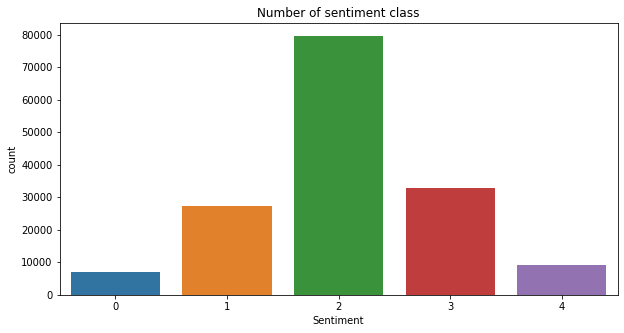

In [34]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(x=train.Sentiment,data=train)

Нормалізую та токенізую кожну стрічку

In [43]:
snow=SnowballStemmer('english')
stopwords_e=stopwords.words('english')
def data_preprocess(text):
    text_nonpunc=[w.lower() for w in text if w not in string.punctuation]
    text_nonpunc=''.join(text_nonpunc)
    text_rmstop=[x for x in text_nonpunc.split(' ') if x not in stopwords_e]
    text_stem=[snow.stem(w) for w in text_rmstop]
    text1=' '.join(text_stem)
    return (text1)


Створю Pipeline 

In [45]:
lrpipeline=Pipeline([('preprocess',CountVectorizer(analyzer=data_preprocess)),
                  ('Tfidf',TfidfTransformer()),
                  ('classify',LogisticRegression())])

Натреную 

In [46]:
lrpipeline.fit(train.Phrase,train.Sentiment)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('preprocess',
                 CountVectorizer(analyzer=<function data_preprocess at 0x00000229173A51F8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u...
                                 tokenizer=None, vocabulary=None)),
                ('Tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classify',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [50]:
result=lrpipeline.predict(test['Phrase'])

Намалювавши графік для результату, видно, що більшість передбачень настрою вийшли для категорії 2

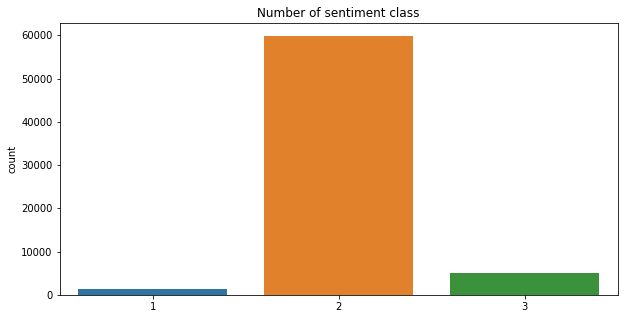

In [57]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(result)

In [62]:
from sklearn.metrics import classification_report
true_answer = pd.read_csv('sampleSubmission.csv');
print(classification_report(true_answer['Sentiment'], result))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.90      0.95     66292
           3       0.00      0.00      0.00         0

    accuracy                           0.90     66292
   macro avg       0.33      0.30      0.32     66292
weighted avg       1.00      0.90      0.95     66292



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
